<a href="https://colab.research.google.com/github/MrD0balina/Deep-Learning---SPA7037U-P/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LinearRegression  - This is a linear regregssion example using Keras

    Copyright (C) 2020 Adrian Bevan, and 2023, 2024 Abbey Waldron,
    Queen Mary University of London

    This program is free software: you can redistribute it and/or modify
    it under the terms of the GNU General Public License as published by
    the Free Software Foundation, either version 3 of the License, or
    (at your option) any later version.

    This program is distributed in the hope that it will be useful,
    but WITHOUT ANY WARRANTY; without even the implied warranty of
    MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
    GNU General Public License for more details.

    You should have received a copy of the GNU General Public License
    along with this program.  If not, see <https://www.gnu.org/licenses/>.

----------------------

LinearRegression example using a Keras model. This is a simple example $y = mx+c$ fitting example that uses an Adam optimiser.  For more information about this optimiser please see the original paper by Kingma and Ba, [arXiv:1412.6980](https://arxiv.org/abs/1412.6980).

----------------------
## Generating the data

To generate the data we randomly sample the domain $x = [xmin, xmax]$, and the noise in this case
is assumed to be relative to the magnitude of the signal (i.e. y value).  *Throughout the following code blocks I will leave some parts out that you need to fill in!*


In [6]:
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
import matplotlib.pyplot as plt
import random
import numpy as np
from textwrap import wrap


In [7]:
"""
Generate the data to be fitted
    xmin      Minimum value in x to sample
    xmax      Maximum value in x to sample
    Ntrain    Number of train data to generate
    Ntest     Number of test data to generate
    m         gradient for the line
    c         constant offset
    Noise     (fractional) Noise level to generate
"""
xmin   = -10
xmax   = 10
Ntrain = 10
Ntest  = 100
m      = 1
c      = 1
Noise  = 5
n=2

def genData(xmin, xmax, Ntrain, Ntest, m, c, Noise):
    """
    Function to generate an ensemble of test and train data for fitting
    """
    print("\033[92mGenerating the parabola data set\033[0m")
    x_train = []
    y_train = []
    x_test  = []
    y_test  = []

    #--------------------------------------------------------------------
    def sim_line(xmin, xmax, m, c, Noise):
        """
        Function to simulate a random data point for a parabola
        """
        x = random.random()*(xmax-xmin)+xmin
        y = (m*(x**n)+c)*(1 + random.random()*Noise)

        return x, y
    #--------------------------------------------------------------------

    for i in range( Ntrain ):
        x,y = sim_line(xmin, xmax, m, c, Noise)
        x_train.append(x)
        y_train.append(y)

    for i in range( Ntest ):
        x,y = sim_line(xmin, xmax, m, c, Noise)
        x_test.append(x)
        y_test.append(y)

    return x_train, y_train, x_test, y_test

# generate data for fitting
x_train, y_train, x_test, y_test = genData(xmin, xmax, Ntrain, Ntest, m, c, Noise)

print("Have generated:")
print("\tN(train) examples            = ", len(x_train))
print("\tN(test) examples             = ", len(x_test))

Generating the parabola data set
Have generated:
	N(train) examples            =  10
	N(test) examples             =  100


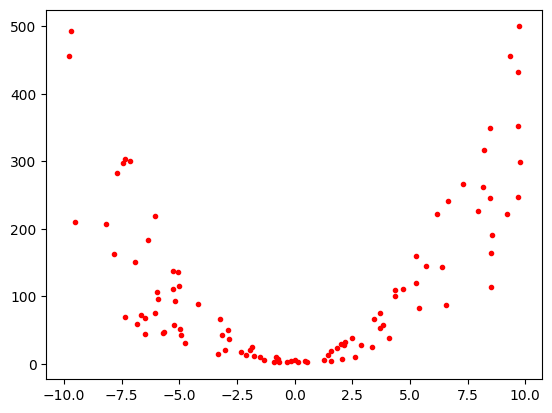

In [8]:
plt.plot( x_test , y_test , "r.") # plot the test data set (x_test, y_test)

In [227]:
                                        print(len(y_train))
                                        print(len(x_train))
                                        print(type(x_test))
                                        print(type(Ntrain))

10
10
<class 'list'>
<class 'int'>


In [228]:
                                        dir(tf.keras.optimizers.__name__)

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmod__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'capitalize',
 'casefold',
 'center',
 'count',
 'encode',
 'endswith',
 'expandtabs',
 'find',
 'format',
 'format_map',
 'index',
 'isalnum',
 'isalpha',
 'isascii',
 'isdecimal',
 'isdigit',
 'isidentifier',
 'islower',
 'isnumeric',
 'isprintable',
 'isspace',
 'istitle',
 'isupper',
 'join',
 'ljust',
 'lower',
 'lstrip',
 'maketrans',
 'partition',
 'removeprefix',
 'removesuffix',
 'replace',
 'rfind',
 'rindex',
 'rjust',
 'rpartition',
 'rsplit',
 'rstrip',
 'split',
 'splitlines',
 'startswith',
 'stri

#GOOGLE COLAB REQUIRED THE TRAIN DATA LISTS TO BE CONVERTED TO ARRAYS
.
.
# WHY IS THIS?

In [229]:
x_test_array = np.array(x_test)
x_train_array = np.array(x_train)
y_test_array = np.array(y_test)
y_train_array = np.array(y_train)

In [230]:
#
# Training configuration
#
Nepochs         = 200 # how many epochs do you think you will need?  start small
learning_rate   = 0.5  # The stepsize of the optimisation process

# build the model
model = tf.keras.models.Sequential()  ## This is a "model class"
model.add( tf.keras.layers.Dense(1, activation='linear', input_shape=[1,]) )

##################### What is going on with this input shape???? ###########################
# N-D tensor with shape: (batch_size, ..., input_dim).
# The most common situation would be a 2D input with shape (batch_size, input_dim).

# now specify the loss function - MSE
loss_fn = tf.keras.losses.MSE

# now we can train the model to make predictions.
#   Use the ADAM optimiser
#   Specify the metrics to report as accuracy
#   Specify the loss function (see above)
# the fit step specifies the number of training epochs
opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=opt, loss=loss_fn )

optimiser = "Adam"

print("--------------------------------------------------------------------------------------------------------------")
print("\033[92mWill perform a linear regression optimisation\033[0m")
print("--------------------------------------------------------------------------------------------------------------\n\n")
print("Input data Linear Regression Data")
print("Nepochs              = ", Nepochs)
print("learning rate        = ", learning_rate)
print("Optimser             =  Adam")
print("Loss function        =  MSE")

history  = model.fit( x_train_array, y_train_array, epochs=Nepochs , verbose = 1)

# Print out the history keys, there is a single key:
#    loss        The loss function evaluated at each epoch for the training set
print("history keys = ", history.history.keys())

print("Display the evolution of the loss as a function of the training epoch")
print("  N(Epochs)                = ", Nepochs)
print("  Initial loss (train)     = {:5.4f}".format( history.history['loss'][0]) )
print("  Final loss (train)       = {:5.4f}".format( history.history['loss'][-1]) )

--------------------------------------------------------------------------------------------------------------
Will perform a linear regression optimisation
--------------------------------------------------------------------------------------------------------------


Input data Linear Regression Data
Nepochs              =  200
learning rate        =  0.5
Optimser             =  Adam
Loss function        =  MSE
Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 593ms/step - loss: 41667.8047
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 41137.2695
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 40621.2578
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 40120.0078
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 39633.7305
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 39162.6055
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 38706.7734
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 38266.3633
Epoch 9/200
1/1 ━━━━━━━━━━━━━━

In [ ]:
                                           ################# ME LEARNING ######################

                                            print(history.history)
                                            print(type(history.history))
                                            print(len(history.history))
                                            print(history.history.keys())
                                            print(history.history.values())

                                            print(len(history.history.values()))

                                            print(len(history.history["loss"])) ## Printing the length of a value associated with a specific key in a dictionary

In [ ]:
                                           ################# ME LEARNING ######################

                                            print(type(history))
                                            print(history)
                                            print(type(history.history))
                                            print(history.history)
                                            print(history.params)

In [ ]:
                                            ################# ME LEARNING ######################
                                            dir(history)

In [ ]:
                                            print(history.model)

In [ ]:
                                            print(history.__dict__)
                                            print(history.__dict__.keys())
                                            print("\n")
                                            print(history.__dict__["history"])

In [ ]:


                                            print(history.history["loss"])

In [231]:
# print(x_test)
# print(len(x_test))

Nepoch_list = []


for i in range(0,Nepochs):

    Nepoch_list.append(i)

    i = i + 1

# print(Nepoch_list)

history_loss_array  = np.array(history.history["loss"])

Nepoch_list_array = np.array(Nepoch_list)

print(history_loss_array)
print(Nepoch_list_array)

print(history_loss_array.shape)
print(Nepoch_list_array.shape)

[41667.8046875  41137.26953125 40621.2578125  40120.0078125
 39633.73046875 39162.60546875 38706.7734375  38266.36328125
 37841.4296875  37432.0234375  37038.1484375  36659.75390625
 36296.74609375 35949.0078125  35616.3515625  35298.5625
 34995.3671875  34706.453125   34431.46875    34170.015625
 33921.6484375  33685.8984375  33462.24609375 33250.1484375
 33049.04296875 32858.3203125  32677.37109375 32505.57421875
 32342.28710938 32186.86914062 32038.68359375 31897.10351562
 31761.50585938 31631.30664062 31505.921875   31384.79296875
 31267.41601562 31153.30078125 31042.         30933.09765625
 30826.23828125 30721.07421875 30617.32421875 30514.73828125
 30413.09960938 30312.22460938 30211.97851562 30112.23828125
 30012.93164062 29913.984375   29815.37109375 29717.06835938
 29619.08203125 29521.41796875 29424.10351562 29327.16210938
 29230.63476562 29134.56640625 29038.98828125 28943.94335938
 28849.47265625 28755.61523438 28662.39648438 28569.84960938
 28478.00585938 28386.87109375 2

In [232]:
                                            ################# ME LEARNING ######################

                                            weights, biases = layer.get_weights()
                                            print(type(weights))
                                            print(type(biases))
                                            print(weights)
                                            print(np.shape(weights))
                                            print(biases)
                                            print(np.shape(biases))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[[-3.3462086]]
(1, 1)
[9.939538]
(1,)


In [233]:
                                            ################# ME LEARNING ######################
print(history.history["loss"])
print(history.history["loss"][-1])
print(type(history.history["loss"][-1]))

[41667.8046875, 41137.26953125, 40621.2578125, 40120.0078125, 39633.73046875, 39162.60546875, 38706.7734375, 38266.36328125, 37841.4296875, 37432.0234375, 37038.1484375, 36659.75390625, 36296.74609375, 35949.0078125, 35616.3515625, 35298.5625, 34995.3671875, 34706.453125, 34431.46875, 34170.015625, 33921.6484375, 33685.8984375, 33462.24609375, 33250.1484375, 33049.04296875, 32858.3203125, 32677.37109375, 32505.57421875, 32342.287109375, 32186.869140625, 32038.68359375, 31897.103515625, 31761.505859375, 31631.306640625, 31505.921875, 31384.79296875, 31267.416015625, 31153.30078125, 31042.0, 30933.09765625, 30826.23828125, 30721.07421875, 30617.32421875, 30514.73828125, 30413.099609375, 30312.224609375, 30211.978515625, 30112.23828125, 30012.931640625, 29913.984375, 29815.37109375, 29717.068359375, 29619.08203125, 29521.41796875, 29424.103515625, 29327.162109375, 29230.634765625, 29134.56640625, 29038.98828125, 28943.943359375, 28849.47265625, 28755.615234375, 28662.396484375, 28569.8496

In [3]:
# summarize history for loss
print("\n\033[1mPlotting the loss function evolution as a function of training epoch\033[0m\n")
plt.plot(  Nepoch_list_array,  history_loss_array ) # plot the 'loss' from history.history

# plt.title("Model loss against Epoch number. optimiser = {}, number of Epochs = {}," \
#           " x_train length = {}, x_test_length, learning rate = {}".format( optimiser , Nepochs , len(x_train) , len(x_test) , learning_rate ) )

plt.title("\n".join(wrap("Model loss against Epoch number. optimiser = {}, number of Epochs = {}," \
                         " x_train length = {}, x_test_length = {}, learning rate = {}, final MSE = {:.3f}" \
                         .format( optimiser , Nepochs , len(x_train) , len(x_test) , learning_rate , history.history["loss"][-1]) , 70 ) )  )


plt.ylabel('loss')
plt.xlabel('epoch')

# plt.yscale('log')

plt.savefig("loss plot: optimiser = {}, number of Epochs = {}," \
            " x_train length = {}, x_test_length = {}, learning rate = {}.png" \
            .format( optimiser , Nepochs , len(x_train) , len(x_test) , learning_rate ) )

plt.show()
plt.clf()

# plot the model for the data
# we are interested in the first layer
layer = model.layers[0]
weights, biases = layer.get_weights()
ymin = weights[0][0]*xmin+biases[0]
ymax = weights[0][0]*xmax+biases[0]

print("\tm = ", weights[0][0])
print("\tc = ", biases[0])
print("\tMSE loss = ".format( history.history['loss'][-1]) )
print("\t Fitted line xrange = {:}, y range = {:}".format([xmin, xmax], [ymin, ymax]))

print("\n\033[1mPlotting the optimised model and test data\033[0m\n")
plt.plot( x_test , y_test , "r.") # plot the test data set (x_test, y_test)
plt.plot([xmin, xmax], [ymin, ymax], "b-")  # plot the fitted line
plt.ylabel('y')
plt.xlabel('x')
plt.legend(["test data", "fitted model"], loc=0)
plt.show()




Plotting the loss function evolution as a function of training epoch



NameError: name 'plt' is not defined

NameError: name 'weights' is not defined

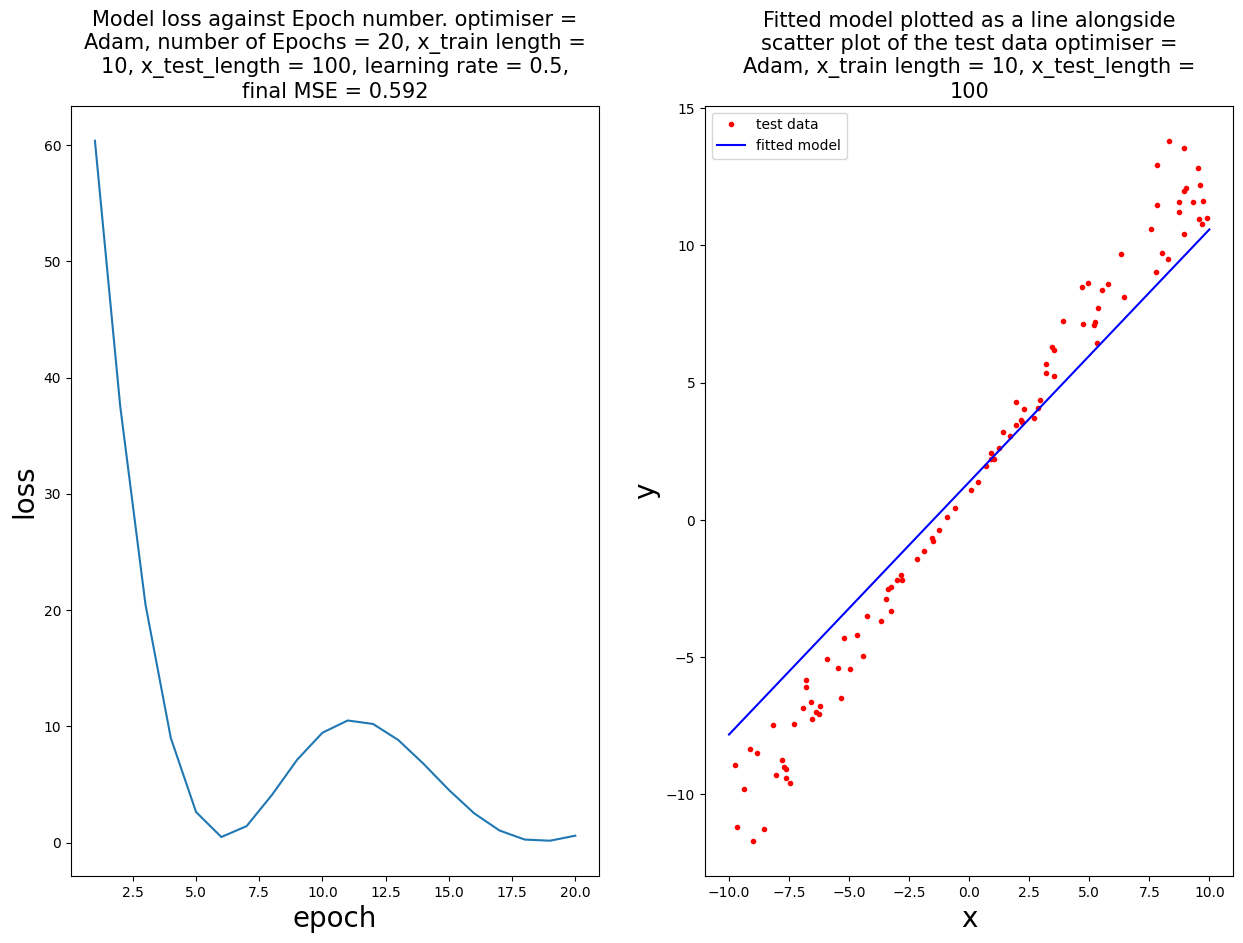

<Figure size 640x480 with 0 Axes>

In [87]:


figure, axis = plt.subplots(1 , 2)


axis[0 , ].figure.set_figwidth(15)
axis[0 , ].figure.set_figheight(10)
axis[0 , ].plot(  Nepoch_list_array,  history_loss_array ) # plot the 'loss' from history.history
axis[0 , ].set_title("\n".join(wrap("Model loss against Epoch number. optimiser = {}, number of Epochs = {}," \
                         " x_train length = {}, x_test_length = {}, learning rate = {}, final MSE = {:.3f}" \
                         .format( optimiser , Nepochs , len(x_train) , len(x_test) , learning_rate , history.history["loss"][-1]) , 45) ), fontsize = 15  )


axis[0 , ].set_ylabel('loss' , fontsize = 20 )
axis[0 , ].set_xlabel('epoch' , fontsize = 20 )
# axis[0 , ].set_yscale('log')


layer = model.layers[0]
weights, biases = layer.get_weights()
ymin = weights[0][0]*xmin+biases[0]
ymax = weights[0][0]*xmax+biases[0]

axis[1 , ].figure.set_figwidth(15)
axis[1 , ].figure.set_figheight(10)
axis[1 , ].plot( x_test , y_test , "r.") # plot the test data set (x_test, y_test)
axis[1 , ].plot([xmin, xmax], [ymin, ymax], "b-")  # plot the fitted line
axis[1 , ].set_ylabel('y' , fontsize = 20 )
axis[1 , ].set_xlabel('x' , fontsize = 20 )


axis[1 , ].set_title("\n".join(wrap("Fitted model plotted as a line alongside scatter plot of the test data" \
                         " optimiser = {}, x_train length = {}, x_test_length = {}" \
                         .format( optimiser , len(x_train) , len(x_test) ) , 45 ) ), fontsize = 15  )

axis[1 , ].legend(["test data", "fitted model"], loc=0)


plt.savefig("MSE plot over epochs and model against scatter of test data: optimiser = {}, number of Epochs = {}," \
            " x_train length = {}, x_test_length = {}, learning rate = {}.png" \
            .format( optimiser , Nepochs , len(x_train) , len(x_test) , learning_rate ) )

plt.show()
plt.clf()


----------------------
## Suggested exercises:

 - Change the number of training examples to see how this affects the optimisation performance (increase by a factor of 10 and decrease by a factor of 10).
 - Change the value of m and c to extract, Try $m=10$, $c=5$, to explore how this affects the training.  You may also need to change the number of epochs when doing this.
 - Change the number of training epochs to see how this affects the optimisation
 - Change the noise level to study how this affects the optimisation.
 - Change the learning rate to explore how robust the training is with the Adam optmiser.
 - You may also wish to explore the use of other optmisers: see https://keras.io/api/optimizers/.

In [9]:
xmin   = -10
xmax   = 10
Ntrain = 100
Ntest  = 100
m      = 5
c      = 5
Noise  = 10

Nepochs         = 10 # how many epochs do you think you will need?  start small
learning_rate   = 0.5  # The stepsize of the optimisation process

In [10]:
x_train, y_train, x_test, y_test = genData(xmin, xmax, Ntrain, Ntest, m, c, Noise)

Generating the parabola data set


In [11]:
x_test_array = np.array(x_test)
x_train_array = np.array(x_train)
y_test_array = np.array(y_test)
y_train_array = np.array(y_train)

In [12]:
print(Nepochs)
# build the model
model = tf.keras.models.Sequential()  ## This is a "model class"
model.add( tf.keras.layers.Dense(1, activation='linear', input_shape=[1,]) )

# now specify the loss function - MSE
loss_fn = tf.keras.losses.MSE

# select optimizer
opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=opt, loss=loss_fn )
optimiser = "Adam"

# fit the model to the training data
history  = model.fit( x_train_array, y_train_array, epochs=Nepochs , verbose = 0)


10


In [13]:
## Gives list of optimisers.

dir(tf.keras.optimizers)

['Adadelta',
 'Adafactor',
 'Adagrad',
 'Adam',
 'AdamW',
 'Adamax',
 'Ftrl',
 'Lamb',
 'Lion',
 'LossScaleOptimizer',
 'Nadam',
 'Optimizer',
 'RMSprop',
 'SGD',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'deserialize',
 'get',
 'legacy',
 'schedules',
 'serialize']

In [15]:

Nepoch_list = []


for i in range(0,Nepochs):

    Nepoch_list.append(i)

    i = i + 1

# print(Nepoch_list)

history_loss_array  = np.array(history.history["loss"])

Nepoch_list_array = np.array(Nepoch_list)

10


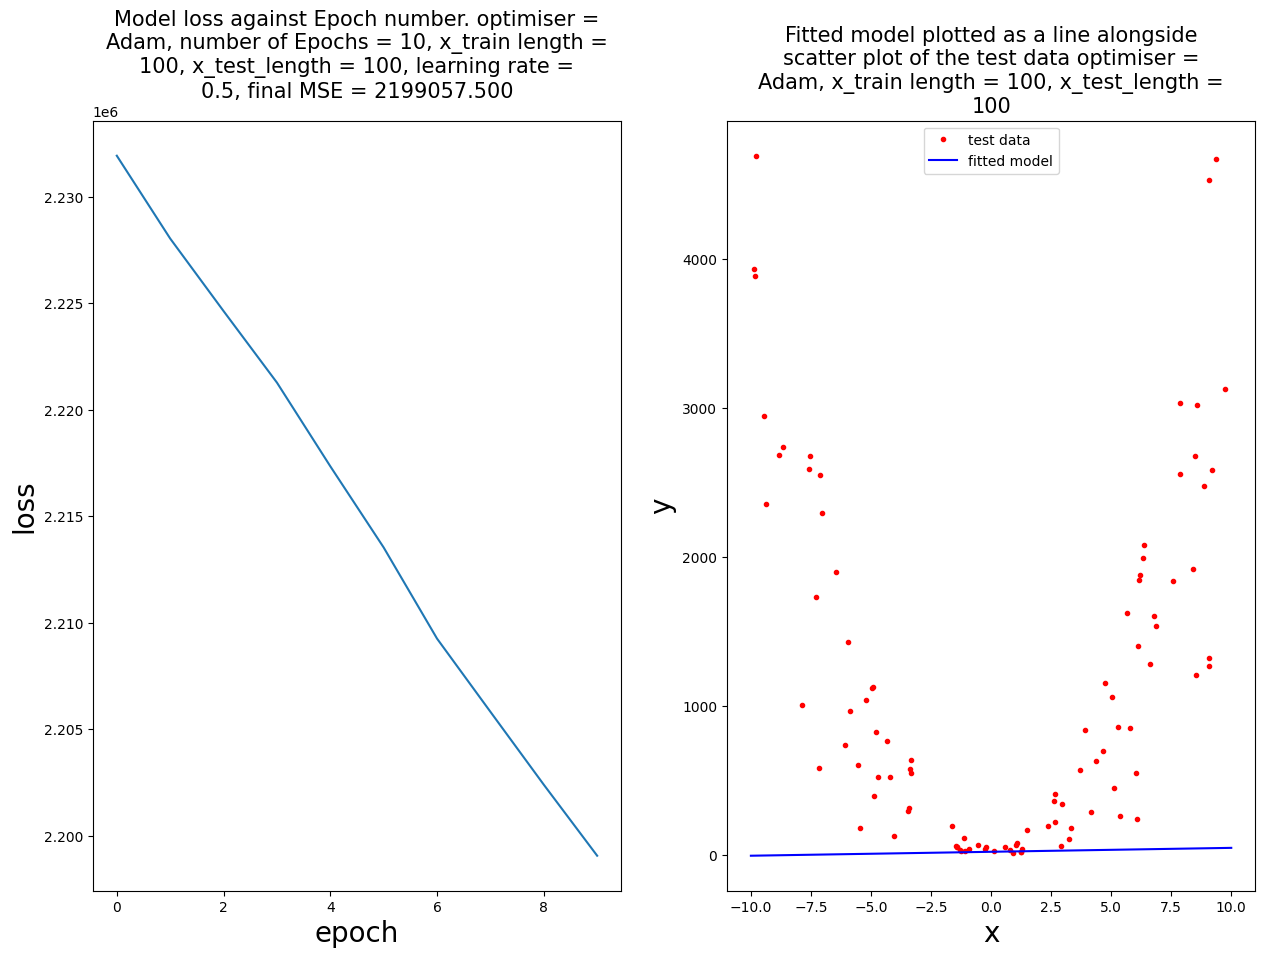

<Figure size 640x480 with 0 Axes>

In [16]:
figure, axis = plt.subplots(1 , 2)


axis[0 , ].figure.set_figwidth(15)
axis[0 , ].figure.set_figheight(10)
axis[0 , ].plot(  Nepoch_list_array,  history_loss_array ) # plot the 'loss' from history.history
axis[0 , ].set_title("\n".join(wrap("Model loss against Epoch number. optimiser = {}, number of Epochs = {}," \
                         " x_train length = {}, x_test_length = {}, learning rate = {}, final MSE = {:.3f}" \
                         .format( optimiser , Nepochs , len(x_train) , len(x_test) , learning_rate , history.history["loss"][-1]) , 45) ), fontsize = 15  )


axis[0 , ].set_ylabel('loss' , fontsize = 20 )
axis[0 , ].set_xlabel('epoch' , fontsize = 20 )
# axis[0 , ].set_yscale('log')


layer = model.layers[0]
weights, biases = layer.get_weights()
ymin = weights[0][0]*xmin+biases[0]
ymax = weights[0][0]*xmax+biases[0]

axis[1 , ].figure.set_figwidth(15)
axis[1 , ].figure.set_figheight(10)
axis[1 , ].plot( x_test , y_test , "r.") # plot the test data set (x_test, y_test)
axis[1 , ].plot([xmin, xmax], [ymin, ymax], "b-")  # plot the fitted line
axis[1 , ].set_ylabel('y' , fontsize = 20 )
axis[1 , ].set_xlabel('x' , fontsize = 20 )


axis[1 , ].set_title("\n".join(wrap("Fitted model plotted as a line alongside scatter plot of the test data" \
                         " optimiser = {}, x_train length = {}, x_test_length = {}" \
                         .format( optimiser , len(x_train) , len(x_test) ) , 45 ) ), fontsize = 15  )

axis[1 , ].legend(["test data", "fitted model"], loc=0)

print(Nepochs)

plt.savefig("NOISE INCREASED -- MSE plot over epochs and model against scatter of test data: optimiser = {}, number of Epochs = {}," \
            " x_train length = {}, x_test_length = {}, learning rate = {}.png" \
            .format( optimiser , Nepochs , len(x_train) , len(x_test) , learning_rate ) )

plt.show()
plt.clf()

In [22]:
print(Nepochs)
print(type(x_test_array))
print(type(y_try ))

10
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [21]:
y_try = weights[0][0]*x_test_array+biases[0]

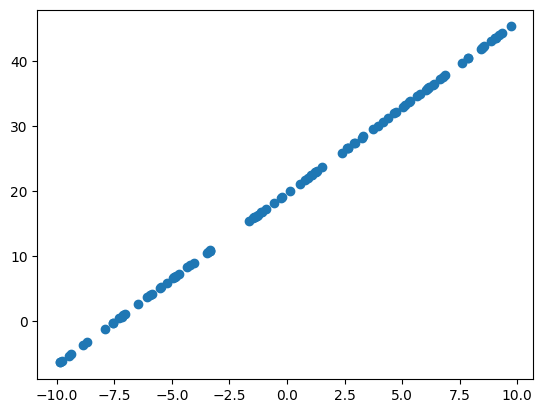

In [23]:
plt.scatter( x_test , y_try  )
plt.show()

#How can I get keras sequential to model a non-linear relationship?

#Playing around with a different model

In [ ]:
################# ME LEARNING ######################

Nepochs         = 20 # how many epochs do you think you will need?  start small
learning_rate   = 0.5  # The stepsize of the optimisation process

# building a model
my_model = tf.keras.models.Sequential()  ## This is a "model class"
# my_model.add( tf.keras.layers.Dense(1, activation='linear', input_shape=[1,]) )
my_model.add( tf.keras.layers.Dense(23, activation='linear', input_shape=[1,]) )
# my_model.add( tf.keras.layers.Dense(23, activation='relu', input_shape=[1,]) )
# my_model.add( tf.keras.layers.Dense(230, activation='relu', input_shape=[1,]) )
# display(my_model.summary())

# now specify the loss function - MSE
loss_fn = tf.keras.losses.MSE

# now we can train the model to make predictions.
#   Use the ADAM optimiser
#   Specify the metrics to report as accuracy
#   Specify the loss function (see above)
# the fit step specifies the number of training epochs
opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)
my_model.compile(optimizer=opt, loss=loss_fn )

my_model_history = my_model.fit( x_train, y_train, epochs=Nepochs )



In [ ]:

Nepoch_list = []


for i in range(1,21):

    Nepoch_list.append(i)

    i = i + 1

# print(Nepoch_list)

my_model_history_loss_array  = np.array(my_model_history.history["loss"])

my_model_Nepoch_list_array = np.array(Nepoch_list)


In [ ]:
# summarize history for loss
print("\n\033[1mPlotting the loss function evolution as a function of training epoch\033[0m\n")
plt.plot(  my_model_Nepoch_list_array,  my_model_history_loss_array ) # plot the 'loss' from history.history
plt.title('my_model loss against Epoch number')
plt.ylabel('my_model loss')
plt.xlabel('my_model epoch')
plt.yscale('log')
plt.show()
plt.clf()

# plot the model for the data
# we are interested in the first layer
layer = my_model.layers[0]
weights, biases = layer.get_weights()
ymin = weights[0][0]*xmin+biases[0]
ymax = weights[0][0]*xmax+biases[0]

print("\tm = ", weights[0][0])
print("\tc = ", biases[0])
print("\tMSE loss = ".format( my_model_history.history['loss'][-1]) )
print("\t Fitted line xrange = {:}, y range = {:}".format([xmin, xmax], [ymin, ymax]))

print("\n\033[1mPlotting the optimised model and test data\033[0m\n")
plt.plot( x_test , y_test , "r.") # plot the test data set (x_test, y_test)
plt.plot([xmin, xmax], [ymin, ymax], "b-")  # plot the fitted line
plt.ylabel('y')
plt.xlabel('x')
plt.legend(["test data", "fitted model"], loc=0)
plt.show()
